in this repository i has developed multiple CNN architecture algorithyms on a custom datasets. such as:<br>



*   VGG16
*   VGG19
*   ResNet-50
*   ResNet-152
*   EfficientNetB0
*   EfficientNetB7

i could,nt get good accuracy due to datasets. but implementation of these algorithms are simply explain all the algorithym.

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import cv2
import os
import pathlib

In [2]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.efficientnet import EfficientNetB0
from keras.applications.efficientnet import EfficientNetB7
from keras.applications.resnet import ResNet50
from keras.applications.resnet import ResNet152

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import load_img,array_to_img,img_to_array,ImageDataGenerator
from keras.applications.vgg16 import VGG16,preprocess_input,decode_predictions
from keras import layers
from keras.models import Sequential

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
folder_names = os.listdir('/content/drive/MyDrive/project/datasets/aggcltr_images') 

In [7]:
folder_names

['Cucumber',
 'Fox_nut(Makhana)',
 'Cherry',
 'Coffee-plant',
 'Lemon',
 'Olive-tree',
 'Pearl_millet(bajra)',
 'Tobacco-plant',
 'almond',
 'banana',
 'cardamom',
 'chilli',
 'clove',
 'coconut',
 'cotton',
 'gram',
 'jowar',
 'jute',
 'maize',
 'mustard-oil',
 'papaya',
 'pineapple',
 'rice',
 'soyabean',
 'sugarcane',
 'sunflower',
 'tea',
 'tomato',
 'vigna-radiati(Mung)',
 'wheat']

In [6]:
data_dr = pathlib.Path('/content/drive/MyDrive/project/datasets/aggcltr_images')

In [9]:
data_dr

PosixPath('/content/drive/MyDrive/project/datasets/aggcltr_images')

In [10]:
list(data_dr.iterdir())          # path for all folders

[PosixPath('/content/drive/MyDrive/project/datasets/aggcltr_images/Cucumber'),
 PosixPath('/content/drive/MyDrive/project/datasets/aggcltr_images/Fox_nut(Makhana)'),
 PosixPath('/content/drive/MyDrive/project/datasets/aggcltr_images/Cherry'),
 PosixPath('/content/drive/MyDrive/project/datasets/aggcltr_images/Coffee-plant'),
 PosixPath('/content/drive/MyDrive/project/datasets/aggcltr_images/Lemon'),
 PosixPath('/content/drive/MyDrive/project/datasets/aggcltr_images/Olive-tree'),
 PosixPath('/content/drive/MyDrive/project/datasets/aggcltr_images/Pearl_millet(bajra)'),
 PosixPath('/content/drive/MyDrive/project/datasets/aggcltr_images/Tobacco-plant'),
 PosixPath('/content/drive/MyDrive/project/datasets/aggcltr_images/almond'),
 PosixPath('/content/drive/MyDrive/project/datasets/aggcltr_images/banana'),
 PosixPath('/content/drive/MyDrive/project/datasets/aggcltr_images/cardamom'),
 PosixPath('/content/drive/MyDrive/project/datasets/aggcltr_images/chilli'),
 PosixPath('/content/drive/MyDriv

In [17]:
len(list(data_dr.iterdir())) # as you can see my all 30 columns path is there

30

In [18]:
list(data_dr.glob('Cucumber/*'))      # all cucumber plant images

[PosixPath('/content/drive/MyDrive/project/datasets/aggcltr_images/Cucumber/image (1).jpeg'),
 PosixPath('/content/drive/MyDrive/project/datasets/aggcltr_images/Cucumber/image (1).jpg'),
 PosixPath('/content/drive/MyDrive/project/datasets/aggcltr_images/Cucumber/image (10).jpg'),
 PosixPath('/content/drive/MyDrive/project/datasets/aggcltr_images/Cucumber/image (11).jpg'),
 PosixPath('/content/drive/MyDrive/project/datasets/aggcltr_images/Cucumber/image (12).jpg'),
 PosixPath('/content/drive/MyDrive/project/datasets/aggcltr_images/Cucumber/image (13).jpg'),
 PosixPath('/content/drive/MyDrive/project/datasets/aggcltr_images/Cucumber/image (15).jpg'),
 PosixPath('/content/drive/MyDrive/project/datasets/aggcltr_images/Cucumber/image (16).jpg'),
 PosixPath('/content/drive/MyDrive/project/datasets/aggcltr_images/Cucumber/image (17).jpg'),
 PosixPath('/content/drive/MyDrive/project/datasets/aggcltr_images/Cucumber/image (18).jpg'),
 PosixPath('/content/drive/MyDrive/project/datasets/aggcltr_i

In [19]:
len(list(data_dr.glob('Cucumber/*')) )   # total 31 images of cucumber plant

31

In [7]:
# function to collect the data
image_dic = {}
label_dic = {}
t = 0
for fold_nm in folder_names:
  imag_path = list(data_dr.glob(fold_nm+'/*'))
  image_dic[fold_nm]=  imag_path
  for i in range(len(imag_path)):
    label_dic[fold_nm] =t
  t+=1




In [21]:
label_dic           # labels for my y_train set

{'Cucumber': 0,
 'Fox_nut(Makhana)': 1,
 'Cherry': 2,
 'Coffee-plant': 3,
 'Lemon': 4,
 'Olive-tree': 5,
 'Pearl_millet(bajra)': 6,
 'Tobacco-plant': 7,
 'almond': 8,
 'banana': 9,
 'cardamom': 10,
 'chilli': 11,
 'clove': 12,
 'coconut': 13,
 'cotton': 14,
 'gram': 15,
 'jowar': 16,
 'jute': 17,
 'maize': 18,
 'mustard-oil': 19,
 'papaya': 20,
 'pineapple': 21,
 'rice': 22,
 'soyabean': 23,
 'sugarcane': 24,
 'sunflower': 25,
 'tea': 26,
 'tomato': 27,
 'vigna-radiati(Mung)': 28,
 'wheat': 29}

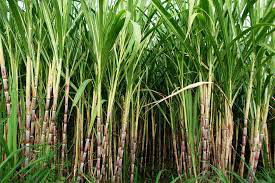

In [22]:
load_img(image_dic['sugarcane'][0])

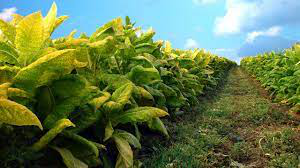

In [23]:
load_img(image_dic['Tobacco-plant'][0])

In [24]:
x,y = [],[]
for key , valu in image_dic.items():
    for item in valu:
        img = cv2.imread(str(item))            # it is reading images as an array it takes path
        reduced_image = cv2.resize(img,(224,224))        # it is reducing the size
        x.append(reduced_image)       # after that append all images in x
        y.append(label_dic[key])        # relatively append the label

In [25]:
len(y)         # there 829 labels which means we have total 829 images

829

In [26]:
len(x)    # total 829 images

829

In [27]:
images = np.array(x)
labels = np.array(y)

In [28]:
labels.shape,images.shape,

((829,), (829, 224, 224, 3))

In [29]:
images[1]       # this is actual pixel value now i will normalize it

array([[[ 14,  30,   0],
        [  9,  32,   0],
        [ 10,  18,  18],
        ...,
        [236, 252, 245],
        [163, 249, 228],
        [186, 242, 227]],

       [[ 21,  36,   8],
        [  7,  25,   4],
        [ 33,  59,   9],
        ...,
        [251, 255, 253],
        [208, 249, 236],
        [193, 238, 207]],

       [[ 22,  36,  12],
        [ 10,  22,   6],
        [ 57,  86,  23],
        ...,
        [253, 252, 254],
        [147, 217, 193],
        [100, 190, 142]],

       ...,

       [[127, 136, 141],
        [112, 120, 126],
        [ 91,  98, 110],
        ...,
        [ 85,  95,  72],
        [ 91, 138,  80],
        [134, 175, 135]],

       [[121, 127, 138],
        [109, 115, 126],
        [ 83,  91, 103],
        ...,
        [ 74,  81,  87],
        [ 64, 114,  71],
        [115, 185, 145]],

       [[125, 133, 141],
        [101, 109, 117],
        [102, 114, 115],
        ...,
        [110, 116, 109],
        [121, 170, 118],
        [114, 172, 129]]

In [30]:
images = images/255.0



In [31]:
images[1]       # images has been normalized

array([[[0.05490196, 0.11764706, 0.        ],
        [0.03529412, 0.1254902 , 0.        ],
        [0.03921569, 0.07058824, 0.07058824],
        ...,
        [0.9254902 , 0.98823529, 0.96078431],
        [0.63921569, 0.97647059, 0.89411765],
        [0.72941176, 0.94901961, 0.89019608]],

       [[0.08235294, 0.14117647, 0.03137255],
        [0.02745098, 0.09803922, 0.01568627],
        [0.12941176, 0.23137255, 0.03529412],
        ...,
        [0.98431373, 1.        , 0.99215686],
        [0.81568627, 0.97647059, 0.9254902 ],
        [0.75686275, 0.93333333, 0.81176471]],

       [[0.08627451, 0.14117647, 0.04705882],
        [0.03921569, 0.08627451, 0.02352941],
        [0.22352941, 0.3372549 , 0.09019608],
        ...,
        [0.99215686, 0.98823529, 0.99607843],
        [0.57647059, 0.85098039, 0.75686275],
        [0.39215686, 0.74509804, 0.55686275]],

       ...,

       [[0.49803922, 0.53333333, 0.55294118],
        [0.43921569, 0.47058824, 0.49411765],
        [0.35686275, 0

In [32]:
labels[0:10]      # top ten labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [33]:
x = images
y = labels

In [34]:
x.shape

(829, 224, 224, 3)

train test split

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=25)

In [36]:
x_train.shape,y_train.shape       # training set

((663, 224, 224, 3), (663,))

In [37]:
x_test.shape,y_test.shape        # testing set

((166, 224, 224, 3), (166,))

In [38]:
input_size = (224,224,3)

In [39]:
len(folder_names)


30

**By VGG16**

In [40]:
input = layers.Input(shape=input_size)
output = VGG16(include_top=True,weights=None,classes=len(folder_names))(input)

In [41]:
model = tf.keras.Model(input,output)
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 30)                134383454 
                                                                 
Total params: 134,383,454
Trainable params: 134,383,454
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.get_layer('vgg16').summary() # summary of vgg16 architecture

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [43]:
hist = model.fit(x_train,y_train,epochs=25,validation_data=(x_test,y_test))


Epoch 1/25
21/21 [==============================] - 33s 738ms/step - loss: 4.9054 - accuracy: 0.0392 - val_loss: 3.4060 - val_accuracy: 0.0301
Epoch 2/25
21/21 [==============================] - 9s 441ms/step - loss: 3.4486 - accuracy: 0.0513 - val_loss: 3.4086 - val_accuracy: 0.0301
Epoch 3/25
21/21 [==============================] - 9s 441ms/step - loss: 3.3949 - accuracy: 0.0407 - val_loss: 3.4407 - val_accuracy: 0.0301
Epoch 4/25
21/21 [==============================] - 9s 444ms/step - loss: 3.3962 - accuracy: 0.0513 - val_loss: 3.4242 - val_accuracy: 0.0301
Epoch 5/25
21/21 [==============================] - 9s 447ms/step - loss: 3.3910 - accuracy: 0.0513 - val_loss: 3.4317 - val_accuracy: 0.0301
Epoch 6/25
21/21 [==============================] - 9s 451ms/step - loss: 3.3867 - accuracy: 0.0513 - val_loss: 3.4476 - val_accuracy: 0.0301
Epoch 7/25
21/21 [==============================] - 10s 479ms/step - loss: 3.3854 - accuracy: 0.0513 - val_loss: 3.4503 - val_accuracy: 0.0301
Epoc

In [45]:
model.save('/content/drive/MyDrive/project/vgg16_model.h5')

In [49]:
history_of_vgg16 = pd.DataFrame(hist.history)
history_of_vgg16

,loss,accuracy,val_loss,val_accuracy
0,4.905413,0.039216,3.405964,0.03012
1,3.448552,0.051282,3.408649,0.03012
2,3.394871,0.040724,3.440676,0.03012
3,3.396177,0.051282,3.424242,0.03012
4,3.391034,0.051282,3.431658,0.03012
5,3.386693,0.051282,3.447563,0.03012
6,3.385449,0.051282,3.450258,0.03012
7,3.385267,0.051282,3.460956,0.03012
8,3.384425,0.051282,3.454692,0.03012
9,3.384229,0.051282,3.461253,0.03012


**By VGG19**

In [73]:
input = layers.Input(shape=input_size)
output = VGG19(include_top=True,weights=None,classes=len(folder_names))(input)

In [75]:
model = tf.keras.Model(input,output)
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 vgg19 (Functional)          (None, 30)                139693150 
                                                                 
Total params: 139,693,150
Trainable params: 139,693,150
Non-trainable params: 0
_________________________________________________________________


In [76]:
hist = model.fit(x_train,y_train,epochs=15,validation_data=(x_test,y_test))

Epoch 1/15
21/21 [==============================] - 13s 563ms/step - loss: 3.4272 - accuracy: 0.0317 - val_loss: 3.4100 - val_accuracy: 0.0301
Epoch 2/15
21/21 [==============================] - 11s 549ms/step - loss: 3.3955 - accuracy: 0.0407 - val_loss: 3.4300 - val_accuracy: 0.0301
Epoch 3/15
21/21 [==============================] - 12s 556ms/step - loss: 3.3911 - accuracy: 0.0513 - val_loss: 3.4395 - val_accuracy: 0.0301
Epoch 4/15
21/21 [==============================] - 12s 554ms/step - loss: 3.3875 - accuracy: 0.0513 - val_loss: 3.4615 - val_accuracy: 0.0301
Epoch 5/15
21/21 [==============================] - 11s 547ms/step - loss: 3.3866 - accuracy: 0.0513 - val_loss: 3.4481 - val_accuracy: 0.0301
Epoch 6/15
21/21 [==============================] - 11s 545ms/step - loss: 3.3857 - accuracy: 0.0513 - val_loss: 3.4551 - val_accuracy: 0.0301
Epoch 7/15
21/21 [==============================] - 11s 530ms/step - loss: 3.3854 - accuracy: 0.0513 - val_loss: 3.4576 - val_accuracy: 0.0301

In [77]:
history_of_VGG19 =pd.DataFrame(hist.history)
history_of_VGG19

,loss,accuracy,val_loss,val_accuracy
0,3.427218,0.031674,3.409972,0.03012
1,3.395483,0.040724,3.430001,0.03012
2,3.391128,0.051282,3.439451,0.03012
3,3.387542,0.051282,3.461457,0.03012
4,3.386578,0.051282,3.448073,0.03012
5,3.385674,0.051282,3.455075,0.03012
6,3.385373,0.051282,3.457556,0.03012
7,3.385802,0.051282,3.450662,0.03012
8,3.385245,0.051282,3.457656,0.03012
9,3.383746,0.051282,3.452943,0.03012


In [78]:
model.save('/content/drive/MyDrive/project/vgg19_model.h5')

BY ResNet-50

In [58]:
input = layers.Input(shape=input_size)
output = ResNet50(include_top=True,weights=None,classes=len(folder_names))(input)

In [59]:
model = tf.keras.Model(input,output)
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 30)                23649182  
                                                                 
Total params: 23,649,182
Trainable params: 23,596,062
Non-trainable params: 53,120
_________________________________________________________________


In [60]:
hist = model.fit(x_train,y_train,epochs=15,validation_data=(x_test,y_test))


Epoch 1/15
21/21 [==============================] - 17s 478ms/step - loss: 4.6286 - accuracy: 0.0679 - val_loss: 23.6585 - val_accuracy: 0.0241
Epoch 2/15
21/21 [==============================] - 7s 335ms/step - loss: 3.4605 - accuracy: 0.1222 - val_loss: 227.2496 - val_accuracy: 0.0181
Epoch 3/15
21/21 [==============================] - 7s 340ms/step - loss: 3.0638 - accuracy: 0.1629 - val_loss: 4.1726 - val_accuracy: 0.0422
Epoch 4/15
21/21 [==============================] - 7s 349ms/step - loss: 2.8563 - accuracy: 0.2142 - val_loss: 3.9994 - val_accuracy: 0.0241
Epoch 5/15
21/21 [==============================] - 7s 342ms/step - loss: 2.6620 - accuracy: 0.2353 - val_loss: 4.3627 - val_accuracy: 0.0241
Epoch 6/15
21/21 [==============================] - 7s 345ms/step - loss: 2.5941 - accuracy: 0.2790 - val_loss: 5.2734 - val_accuracy: 0.0361
Epoch 7/15
21/21 [==============================] - 7s 347ms/step - loss: 2.5404 - accuracy: 0.2956 - val_loss: 4.9638 - val_accuracy: 0.0663
Ep

In [61]:
history_of_resnet =pd.DataFrame(hist.history)
history_of_resnet

,loss,accuracy,val_loss,val_accuracy
0,4.628579,0.067873,23.658480,0.024096
1,3.460549,0.122172,227.249619,0.018072
2,3.063817,0.162896,4.172554,0.042169
3,2.856301,0.214178,3.999372,0.024096
4,2.662045,0.235294,4.362681,0.024096
5,2.594129,0.279035,5.273431,0.036145
6,2.540419,0.295626,4.963787,0.066265
7,2.484450,0.306184,4.480464,0.066265
8,2.211254,0.319759,5.056650,0.054217
9,2.121953,0.383107,5.549791,0.036145


In [62]:
model.save('/content/drive/MyDrive/project/ResNet_50_model.h5')


**By ResNet152**

In [66]:
input = layers.Input(shape=input_size)
output = ResNet152(include_top=True,weights=None,classes=len(folder_names))(input)

In [67]:
model = tf.keras.Model(input,output)
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 resnet152 (Functional)      (None, 30)                58432414  
                                                                 
Total params: 58,432,414
Trainable params: 58,280,990
Non-trainable params: 151,424
_________________________________________________________________


In [68]:
hist = model.fit(x_train,y_train,epochs=15,validation_data=(x_test,y_test))


Epoch 1/15
21/21 [==============================] - 34s 921ms/step - loss: 4.6825 - accuracy: 0.0407 - val_loss: 3.4637 - val_accuracy: 0.0181
Epoch 2/15
21/21 [==============================] - 17s 810ms/step - loss: 3.8896 - accuracy: 0.0694 - val_loss: 223.4917 - val_accuracy: 0.0120
Epoch 3/15
21/21 [==============================] - 17s 822ms/step - loss: 3.4074 - accuracy: 0.0814 - val_loss: 3.7151 - val_accuracy: 0.0361
Epoch 4/15
21/21 [==============================] - 17s 825ms/step - loss: 3.2474 - accuracy: 0.1161 - val_loss: 4.1401 - val_accuracy: 0.0120
Epoch 5/15
21/21 [==============================] - 17s 821ms/step - loss: 3.0876 - accuracy: 0.1161 - val_loss: 4.5585 - val_accuracy: 0.0120
Epoch 6/15
21/21 [==============================] - 17s 817ms/step - loss: 3.0922 - accuracy: 0.1222 - val_loss: 4.4758 - val_accuracy: 0.0120
Epoch 7/15
21/21 [==============================] - 17s 813ms/step - loss: 2.9740 - accuracy: 0.1508 - val_loss: 4.6324 - val_accuracy: 0.02

In [69]:
history_of_resnet152 =pd.DataFrame(hist.history)
history_of_resnet152

,loss,accuracy,val_loss,val_accuracy
0,4.682469,0.040724,3.463665,0.018072
1,3.889597,0.069382,223.491745,0.012048
2,3.407355,0.081448,3.715104,0.036145
3,3.247445,0.116139,4.140061,0.012048
4,3.087633,0.116139,4.558503,0.012048
5,3.092214,0.122172,4.475798,0.012048
6,2.974030,0.150830,4.632426,0.024096
7,2.825028,0.170437,5.034051,0.024096
8,2.739881,0.199095,5.411020,0.024096
9,2.630183,0.236802,4.818325,0.030120


In [70]:
model.save('/content/drive/MyDrive/project/ResNet_152_model.h5')


**by EfficientNetB0 architecture**

In [50]:
input = layers.Input(shape=input_size)
output = EfficientNetB0(include_top=True,weights=None,classes=len(folder_names))(input)

In [51]:
model = tf.keras.Model(input,output)
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 30)               4088001   
                                                                 
Total params: 4,088,001
Trainable params: 4,045,978
Non-trainable params: 42,023
_________________________________________________________________


In [52]:
hist = model.fit(x_train,y_train,epochs=15,validation_data=(x_test,y_test))

Epoch 1/15
21/21 [==============================] - 20s 489ms/step - loss: 4.3446 - accuracy: 0.0452 - val_loss: 3.4298 - val_accuracy: 0.0181
Epoch 2/15
21/21 [==============================] - 7s 317ms/step - loss: 3.8621 - accuracy: 0.0784 - val_loss: 3.4519 - val_accuracy: 0.0301
Epoch 3/15
21/21 [==============================] - 7s 321ms/step - loss: 3.6382 - accuracy: 0.1056 - val_loss: 3.4658 - val_accuracy: 0.0542
Epoch 4/15
21/21 [==============================] - 7s 321ms/step - loss: 3.4576 - accuracy: 0.1357 - val_loss: 3.5776 - val_accuracy: 0.0361
Epoch 5/15
21/21 [==============================] - 7s 322ms/step - loss: 3.3141 - accuracy: 0.1659 - val_loss: 3.6321 - val_accuracy: 0.0361
Epoch 6/15
21/21 [==============================] - 7s 324ms/step - loss: 2.9179 - accuracy: 0.2262 - val_loss: 3.7998 - val_accuracy: 0.0361
Epoch 7/15
21/21 [==============================] - 7s 333ms/step - loss: 2.6714 - accuracy: 0.2519 - val_loss: 3.6731 - val_accuracy: 0.0361
Epoch

In [53]:
model.save('/content/drive/MyDrive/project/efficientB0_model.h5')

In [54]:
history_of_effB0 =pd.DataFrame(hist.history)
history_of_effB0

,loss,accuracy,val_loss,val_accuracy
0,4.344551,0.045249,3.429808,0.018072
1,3.862132,0.078431,3.451910,0.030120
2,3.638166,0.105581,3.465790,0.054217
3,3.457565,0.135747,3.577581,0.036145
4,3.314132,0.165913,3.632108,0.036145
5,2.917871,0.226244,3.799752,0.036145
6,2.671392,0.251885,3.673126,0.036145
7,2.264699,0.387632,3.820494,0.036145
8,1.960065,0.461538,5.395837,0.036145
9,1.622665,0.580694,4.212729,0.042169


**by the EfficientNetB7 latest version**

In [8]:
x,y = [],[]
for key , valu in image_dic.items():
    for item in valu:
        img = cv2.imread(str(item))            # it is reading images as an array it takes path
        reduced_image = cv2.resize(img,(600,600))        # it is reducing the size
        x.append(reduced_image)       # after that append all images in x
        y.append(label_dic[key])        # relatively append the label

In [9]:
x = np.array(x)/255.0
y = np.array(y)/255.0

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [80]:
input_sz=(600,600,3)

In [56]:
input = layers.Input(shape=input_sz)
output = EfficientNetB7(include_top=True,weights=None,classes=len(folder_names))(input)

In [57]:
model = tf.keras.Model(input,output)
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb7 (Functional)  (None, 30)               64174517  
                                                                 
Total params: 64,174,517
Trainable params: 63,863,790
Non-trainable params: 310,727
_________________________________________________________________


i did,nt train this model due to system performance